In [43]:
from openai import OpenAI

client = OpenAI(
    base_url="http://localhost:8000/v1",
    # base_url="http://0.tcp.ap.ngrok.io:17717/v1",
    api_key="token-abc123",
)

In [ ]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

response = client.chat.completions.create(
  model="Qwen2-VL-7B-Instruct",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {"type": "image_url", "image_url": {"url": image_url}},
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content);

In [39]:
import base64

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# base64_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

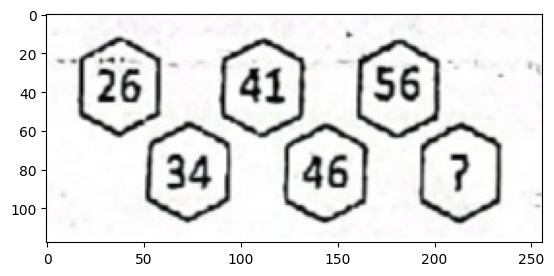

In [40]:
# Path to your image
image_path = "/media/shayekh/Data/_learn_/agents/vl-exams/data/iq8.png"
# image_path = "/media/shayekh/Data/_learn_/agents/vl-exams/data/chem.png"

# Getting the base64 string
base64_image = encode_image(image_path)

img = mpimg.imread(image_path)
plt.imshow(img)

image_url = f"data:image/jpeg;base64,{base64_image}"

In [41]:
# question = "What’s in this image?"
question = """Categorize the image: 

symbols, figures, graph, table, text-only, math formulae, chemical reactions, IQ question.

Answer in this format:

{Explanation}
{Category}
"""

response = client.chat.completions.create(
  model="Qwen2-VL-72B-Instruct",
  messages=[{"role": "user", "content": [{"type": "text", "text": question},
        {"type": "image_url", "image_url": {"url": image_url}},], }],
  max_tokens=300,
  temperature=0.0,
)

print(response.choices[0].message.content)

{Explanation}
The image contains a series of hexagons with numbers inside them, arranged in a pattern. This type of image is often used in IQ tests or puzzles where the goal is to identify a pattern or rule that governs the sequence of numbers and then use that rule to determine the missing number.

{Category}
IQ question


In [23]:
# question = "What’s in this image?"
question = """Categorize the image: 

symbols, figures, graph, table, text-only, math formulae, chemical reactions, IQ question.

Only mention the category without additional explanations.
"""

response = client.chat.completions.create(
  model="Qwen2-VL-72B-Instruct",
  messages=[{"role": "user", "content": [{"type": "text", "text": question},
        {"type": "image_url", "image_url": {"url": image_url}},], }],
  max_tokens=300,
  temperature=0.0,
)

print(response.choices[0].message.content)

Chemical reactions


In [21]:
question = "What’s in this image?"
question = """Categorize the image: 

symbols, figures, graph, table, text-only, math formulae, chemical reaction.
"""

response = client.chat.completions.create(
  model="Qwen2-VL-7B-Instruct",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": question},
        {"type": "image_url", "image_url": {"url": image_url}},
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content)

The image is a collection of symbols forming a pattern. The symbols in the image are the following numbers: 26, 41, 56, 34, 46, and 7.
